In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/dados_imoveis.csv',sep=';')
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [28]:
df['Valor_log'] = np.log(df['Valor'])
df['Area_log'] = np.log(df['Area'])
df['Dist_Praia_log'] = np.log(df['Dist_Praia'])
df['Dist_Farmacia_log'] = np.log(df['Dist_Farmacia'])
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,Valor_log,Area_log,Dist_Praia_log,Dist_Farmacia_log
0,4600000,280,0.240925,0.793637,15.341567,5.634790,-1.423268,-0.231129
1,900000,208,0.904136,0.134494,13.710150,5.337538,-0.100776,-2.006236
2,2550000,170,0.059525,0.423318,14.751604,5.135798,-2.821354,-0.859632
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.058894,-0.644235
4,2200000,164,0.239758,0.192374,14.603968,5.099866,-1.428127,-1.648314


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

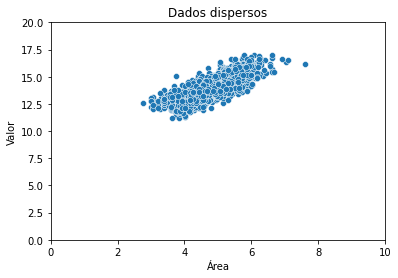

In [30]:
ax = sns.scatterplot(x=df['Area_log'],y=df['Valor_log'])

ax.set_xlim(0,10)
ax.set_ylim(0,20)
ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [31]:
def predictive_line(x_i, theta_1, theta_0):
    return x_i * theta_1 + theta_0

In [32]:
def mean_squared_error(predictive_value,y):
    return np.array([(y_i-y_predictive)**2 for y_i, y_predictive in zip(y, predictive_value)]).mean()

In [33]:
def least_squares(x, y):
    theta_1 = np.corrcoef(x,y)[0,1] * (y.std()/x.std())
    theta_0 = y.mean() - theta_1 * x.mean()
    return theta_1, theta_0

In [34]:
theta_1, theta_0 = least_squares(x=df['Area_log'],y=df['Valor_log'])
print(f'theta_1: {round(theta_1,4)}')
print(f'theta_0: {round(theta_0,4)}')

theta_1: 1.2731
theta_0: 7.8065


In [35]:
predictive_values = predictive_line(df['Area_log'], theta_1, theta_0)
print(f'predictive_values: {round(predictive_values,4)}')

predictive_values: 0       14.9803
1       14.6019
2       14.3450
3       13.6695
4       14.2993
         ...   
4995    13.2154
4996    13.9838
4997    13.2154
4998    12.9083
4999    13.5907
Name: Area_log, Length: 5000, dtype: float64


In [36]:
print(f'mean_squared_error: {round(mean_squared_error(predictive_values,df["Valor_log"]),4)}')

mean_squared_error: 0.2923


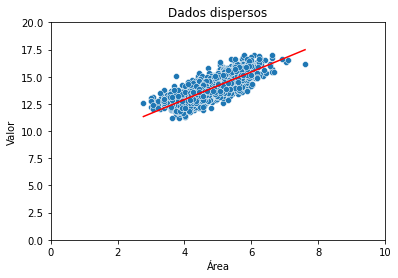

In [37]:
ax = sns.scatterplot(x=df['Area_log'],y=df['Valor_log'])
ax = sns.lineplot(x=df['Area_log'],y=predictive_values,color='red')

ax.set_xlim(0,10)
ax.set_ylim(0,20)
ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [38]:
def r_2(predictive_value,y):
    predicted_variance = sum([(y_i - y_previsto)**2 for y_i, y_previsto in zip(y, predictive_value)])
    variance = sum([(y_i - y.mean())**2 for y_i in y])
    return predicted_variance/variance


In [39]:
print(f'r_2: {round(r_2(predictive_values,df["Valor_log"]),4)}')

r_2: 0.358


In [40]:
np.exp(predictive_line(np.log(72), theta_1, theta_0)) # Test 72m²

568778.569868879

In [41]:
def derivative(theta_0, theta_1, x, y):
    dtheta_0 = 0
    dtheta_1 = 0

    for x_i, y_i in zip(x ,y):
        dtheta_0 += predictive_line(x_i, theta_1, theta_0) - y_i
        dtheta_1 += (predictive_line(x_i, theta_1, theta_0) - y_i) * x_i
    
    dtheta_0 /= 0.5*len(x)
    dtheta_1 /= 0.5*len(x)

    return dtheta_0, dtheta_1

In [42]:
def gradient_descent(theta_0, theta_1, x, y, alpha):
    dtheta_0, dtheta_1 = derivative(theta_0, theta_1, x, y)

    theta_0 -= alpha*dtheta_0
    theta_1 -= alpha*dtheta_1

    return theta_0, theta_1

In [43]:
import random
random.seed(42)

In [44]:
theta_0 = random.random()
theta_1 = random.random()

for i in range(10000):
    if i % 1000 == 0:
        predictived_values = predictive_line(df['Area_log'], theta_1, theta_0)
        print(f'mean_squared_error: {round(mean_squared_error(predictived_values,df["Valor_log"]),4)}')
    theta_0, theta_1 = gradient_descent(theta_0, theta_1, df['Area_log'], df["Valor_log"], 0.01)

mean_squared_error: 168.2212
mean_squared_error: 0.6593
mean_squared_error: 0.4999
mean_squared_error: 0.4097
mean_squared_error: 0.3587
mean_squared_error: 0.3298
mean_squared_error: 0.3135
mean_squared_error: 0.3043
mean_squared_error: 0.2991
mean_squared_error: 0.2961


In [45]:
print(f'r_2: {round(r_2(predictive_line(df["Area_log"], theta_1, theta_0),df["Valor_log"]),4)}')

r_2: 0.3607


In [46]:
np.exp(predictive_line(np.log(72), theta_1, theta_0)) # Test 72m²

549883.1690804189

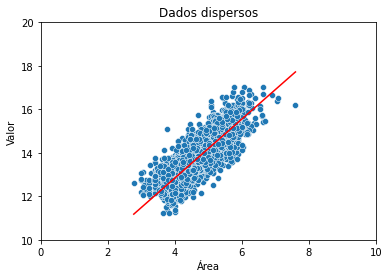

In [27]:
ax = sns.scatterplot(x=df['Area_log'],y=df['Valor_log'])
ax = sns.lineplot(x=df['Area_log'],y=predictive_line(df["Area_log"], theta_1, theta_0),color='red')

ax.set_xlim(0,10)
ax.set_ylim(10,20)
ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(df['Area_log'].values.reshape(len(df),1),df['Valor_log'])

LinearRegression()

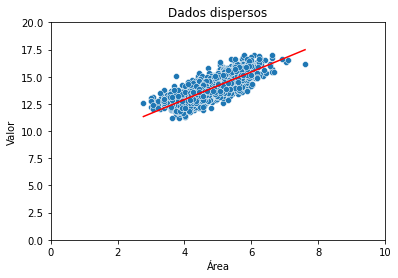

In [25]:
ax = sns.scatterplot(x=df['Area_log'],y=df['Valor_log'])
ax = sns.lineplot(x=df['Area_log'],y=lr.predict(df['Area_log'].values.reshape(len(df),1)),color='red')

ax.set_xlim(0,10)
ax.set_ylim(0,20)
ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [26]:
from sklearn.metrics import r2_score

r2_score(df['Valor_log'],lr.predict(df['Area_log'].values.reshape(len(df),1)))

0.6419756524871572